###Project Title  
## <font color='Blue'>Analyzing Twitter Trends </font>
**Description:**  
This project focuses on analyzing Twitter trends to uncover valuable insights into public sentiment, engagement patterns, and emerging topics. By examining trending hashtags, keywords, and user interactions, the project aims to identify how trends evolve, the role of influencers in amplifying discussions, and regional variations in trending topics. The findings will provide a deeper understanding of how social media shapes communication and influences societal behaviors.

Students :
*   Lujain Bu Qasim- S20106753
*   Refan M. AlGannas-S21107023

Instructor:

*  Prof.Passent Elkafrawy


Course :

*  CS40731 (Analysing and Visualizing Data)



## <font color='grey'>The dataset contains the following key columns:</font>
Tweet_ID: Unique identifier for each tweet.<br/>
Username: User who posted the tweet.<br/>
Text: The actual tweet content.<br/>
Retweets and Likes: Engagement metrics.<br/>
Timestamp: Date and time of the tweet.<br/>

# 1.Importing Necessary Libraries

In [1]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")


# 2.Data exploration

In [2]:
import pandas as pd

twit =pd.read_csv('/content/drive/MyDrive/twitter_dataset.csv')
twit

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,1/30/2023 11:00
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,1/2/2023 22:45
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,1/18/2023 11:25
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,4/10/2023 22:06
4,5,carlwarren,Involve sense former often approach government...,27,80,1/24/2023 7:12
...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,1/15/2023 11:46
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,5/6/2023 0:46
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2/27/2023 14:55
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,1/9/2023 16:09


In [3]:
twit.shape

(10000, 6)

In [48]:
twit.columns

Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp',
       'Sentiment'],
      dtype='object')

In [49]:
twit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
 6   Sentiment  10000 non-null  object
dtypes: int64(3), object(4)
memory usage: 547.0+ KB


#3.Preprocessing

## <font color='green'>Cleaning text </font>

* A good practice is to standardize the text.
* For an easier text manipulation we will convert any string to lowercase.
* We will remove special characters and any strings that are not going to be needed for further analysis.

**String module**

Cleaning the tweets before going though any other text manipulation is helpful. For these first steps we will use some of the methods that the module String has. __[To learn more about the String methods click here.](https://docs.python.org/3/library/stdtypes.html#string-methods)__

Some of the String Methods:

- capitalize():	Converts the first character to upper case
- casefold():	Converts string into lower case
- center():	Returns a centered string
- count():	Returns the number of times a specified value occurs in a string
- endswith():	Returns true if the string ends with the specified value
- find():	Searches the string for a specified value and returns the position of where it was found
- isalnum()	Returns True if all characters in the string are alphanumeric
- isalpha()	Returns True if all characters in the string are in the alphabet
- isascii()	Returns True if all characters in the string are ascii characters
- isdecimal()	Returns True if all characters in the string are decimals
- isdigit()	Returns True if all characters in the string are digits
- isidentifier()	Returns True if the string is an identifier
- islower()	Returns True if all characters in the string are lower case
- isnumeric()	Returns True if all characters in the string are numeric
- isprintable()	Returns True if all characters in the string are printable
- isspace()	Returns True if all characters in the string are whitespaces
- istitle()	Returns True if the string follows the rules of a title
- isupper()	Returns True if all characters in the string are upper case
- lower()	Converts a string into lower case
- lstrip()	Returns a left trim version of the string
- replace()	Returns a string where a specified value is replaced with a specified value
- rsplit()	Splits the string at the specified separator, and returns a list
- rstrip()	Returns a right trim version of the string
- split()	Splits the string at the specified separator, and returns a list
- splitlines()	Splits the string at line breaks and returns a list
- startswith()	Returns true if the string starts with the specified value
- strip()	Returns a trimmed version of the string
- swapcase()	Swaps cases, lower case becomes upper case and vice versa
- title()	Converts the first character of each word to upper case
- translate()	Returns a translated string
- upper()	Converts a string into upper case
- zfill()	Fills the string with a specified number of 0 values at the beginning

In [4]:
# Before we start, let's create a copy of our data so we can compare all the changes later.
tweets_copy = twit.copy()

In [5]:
# Converting any uppercase string to lowercase.
tweets_copy["Text"]= tweets_copy["Text"].str.lower()
tweets_copy.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,party least receive say or single. prevent pre...,2,25,1/30/2023 11:00
1,2,richardhester,hotel still congress may member staff. media d...,35,29,1/2/2023 22:45
2,3,williamsjoseph,nice be her debate industry that year. film wh...,51,25,1/18/2023 11:25
3,4,danielsmary,laugh explain situation career occur serious. ...,37,18,4/10/2023 22:06
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12


In [6]:
import string

tweets_copy= tweets_copy.astype(str)
tweets_copy["Text"] = tweets_copy["Text"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
tweets_copy.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00
1,2,richardhester,hotel still congress may member staff media dr...,35,29,1/2/2023 22:45
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12


In [7]:
# Remove URLs and special characters
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    return text

twit['Text'] = tweets_copy['Text'].apply(clean_text)
twit

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00
1,2,richardhester,hotel still congress may member staff media dr...,35,29,1/2/2023 22:45
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12
...,...,...,...,...,...,...
9995,9996,ntate,agree reflect military box ability ever hold i...,81,86,1/15/2023 11:46
9996,9997,garrisonjoshua,born which push still degree sometimes control...,73,100,5/6/2023 0:46
9997,9998,adriennejackson,you day agent likely region teacher data messa...,10,62,2/27/2023 14:55
9998,9999,kcarlson,guess without successful save particular natur...,21,60,1/9/2023 16:09


In [8]:
### Replacing emojis and emoticons with words
# We will use the library emot, which is open source.
# we'll need version 2.1 specifically
!pip install emot==2.1
from emot.emo_unicode import UNICODE_EMO,EMOTICONS
UNICODE_EMO['😂'].replace(",", " ").replace(":", " ").split()
#UNICODE_EMO['😂']

['face_with_tears_of_joy']

In [9]:
EMOTICONS

{':‑\\)': 'Happy face or smiley',
 ':\\)': 'Happy face or smiley',
 ':-\\]': 'Happy face or smiley',
 ':\\]': 'Happy face or smiley',
 ':-3': 'Happy face smiley',
 ':3': 'Happy face smiley',
 ':->': 'Happy face smiley',
 ':>': 'Happy face smiley',
 '8-\\)': 'Happy face smiley',
 ':o\\)': 'Happy face smiley',
 ':-\\}': 'Happy face smiley',
 ':\\}': 'Happy face smiley',
 ':-\\)': 'Happy face smiley',
 ':c\\)': 'Happy face smiley',
 ':\\^\\)': 'Happy face smiley',
 '=\\]': 'Happy face smiley',
 '=\\)': 'Happy face smiley',
 ':‑D': 'Laughing, big grin or laugh with glasses',
 ':D': 'Laughing, big grin or laugh with glasses',
 '8‑D': 'Laughing, big grin or laugh with glasses',
 '8D': 'Laughing, big grin or laugh with glasses',
 'X‑D': 'Laughing, big grin or laugh with glasses',
 'XD': 'Laughing, big grin or laugh with glasses',
 '=D': 'Laughing, big grin or laugh with glasses',
 '=3': 'Laughing, big grin or laugh with glasses',
 'B\\^D': 'Laughing, big grin or laugh with glasses',
 ':-\\)\\

In [10]:
#Converting emojis into words.
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(
            emot,
            "  ".join(UNICODE_EMO[emot].replace(",", " ").replace(":", " ").split()),
        )
    return text


# Example:
emotions = "✨🎉😍👌 🤩 😂😎"
convert_emojis(emotions)

'sparklesparty_poppersmiling_face_with_heart-eyesOK_hand 🤩 face_with_tears_of_joysmiling_face_with_sunglasses'

In [11]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(
            u"(" + emot + ")", " ".join(EMOTICONS[emot].replace(",", "").split()), text
        )
    return text

In [12]:
# Example:
faces = ":) =) XD :D :( :D :3 ^_^"
convert_emoticons(faces)

'Happy face or smiley Happy face smiley Laughing big grin or laugh with glasses Laughing big grin or laugh with glasses Frown sad andry or pouting Laughing big grin or laugh with glasses Happy face smiley Joyful'

In [13]:
twit["Text"] = twit["Text"].apply(convert_emoticons)
twit["Text"] = twit["Text"].apply(convert_emojis)
twit.head(10)

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00
1,2,richardhester,hotel still congress may member staff media dr...,35,29,1/2/2023 22:45
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12
5,6,ramirezmikayla,cell without report weight could father change...,22,75,3/30/2023 9:56
6,7,fieldsbrian,receive difference their responsibility build ...,12,43,1/2/2023 3:15
7,8,jgood,five sort guy why politics than somebody prett...,0,12,1/22/2023 20:08
8,9,turneredgar,reveal table state view manager she fly yeah d...,15,26,3/24/2023 15:17
9,10,audreymooney,list allow family rather continue agency messa...,97,28,2/1/2023 20:32


In [14]:
def remove_mentions(tweets):
    mention_pattern = re.compile(r"(@[A-Za-z0-9]+)|[_]|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
    return mention_pattern.sub(r"", tweets)


twit["Text"] = twit["Text"].apply(remove_mentions)
twit.head(5)

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00
1,2,richardhester,hotel still congress may member staff media dr...,35,29,1/2/2023 22:45
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12


In [15]:
# Removing any noise that might be left: Special characters


In [16]:
# Stopwords
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stopwords from nltk.corpus

stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

print()
print('\033[92m')
print(twit)
print('\033[94m')

tweets_clean = []

for word in twit: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...


Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
twit.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00
1,2,richardhester,hotel still congress may member staff media dr...,35,29,1/2/2023 22:45
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12


In [18]:
# Tokenization
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# Ensure all values in the 'Text' column are strings before tokenizing
twit["Text"] = twit["Text"].astype(str)

# tokenize tweets
twit["Text"] = twit["Text"].apply(lambda twit: tokenizer.tokenize(twit))

print("Combined tweets_df data:\n", twit.head())

Combined tweets_df data:
    Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  [party, least, receive, say, or, single, preve...         2     25   
1  [hotel, still, congress, may, member, staff, m...        35     29   
2  [nice, be, her, debate, industry, that, year, ...        51     25   
3  [laugh, explain, situation, career, occur, ser...        37     18   
4  [involve, sense, former, often, approach, gove...        27     80   

         Timestamp  
0  1/30/2023 11:00  
1   1/2/2023 22:45  
2  1/18/2023 11:25  
3  4/10/2023 22:06  
4   1/24/2023 7:12  


In [19]:
twit.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,"[party, least, receive, say, or, single, preve...",2,25,1/30/2023 11:00
1,2,richardhester,"[hotel, still, congress, may, member, staff, m...",35,29,1/2/2023 22:45
2,3,williamsjoseph,"[nice, be, her, debate, industry, that, year, ...",51,25,1/18/2023 11:25
3,4,danielsmary,"[laugh, explain, situation, career, occur, ser...",37,18,4/10/2023 22:06
4,5,carlwarren,"[involve, sense, former, often, approach, gove...",27,80,1/24/2023 7:12


In [20]:
print(twit[['Text']].head())
print(type(twit['Text'][0]))  # Check the type of the first element

                                                Text
0  [party, least, receive, say, or, single, preve...
1  [hotel, still, congress, may, member, staff, m...
2  [nice, be, her, debate, industry, that, year, ...
3  [laugh, explain, situation, career, occur, ser...
4  [involve, sense, former, often, approach, gove...
<class 'list'>


In [21]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization with list handling
def lemmatize_text(text):
    # Check if 'text' is a list; if so, join it into a string
    if isinstance(text, list):
        text = " ".join(text)
    # Perform lemmatization
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply the function to the 'clean_tweets' column
twit['Text'] = twit['Text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
twit.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00
1,2,richardhester,hotel still congress may member staff medium d...,35,29,1/2/2023 22:45
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12


# 4.Sentiment Analysis of Tweets

Positive polarity: If the text has more positive words (e.g., "happy", "great", "amazing"), the polarity score will be positive (closer to 1).<br>
Negative polarity: If the text has more negative words (e.g., "sad", "horrible", "angry"), the polarity score will be negative (closer to -1).<br>
Neutral polarity: If the text does not express strong emotions, the polarity score will be close to 0.<br>

In [23]:
# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Assuming 'twit' is our DataFrame containing the tweets
!pip install textblob
from textblob import TextBlob

# Apply sentiment analysis to the 'Text' column
twit['Sentiment'] = twit['Text'].apply(classify_sentiment_textblob)

# Display the first few rows with the new Sentiment column
print(twit[['Text', 'Sentiment']].head())  # Adjust columns as needed

#save the updated dataset
twit.to_csv('twitter_dataset_with_sentiment.csv', index=False)
print("Updated dataset saved as 'twitter_dataset_with_sentiment.csv'")

                                                Text Sentiment
0  party least receive say or single prevent prev...  Positive
1  hotel still congress may member staff medium d...  Positive
2  nice be her debate industry that year film whe...  Positive
3  laugh explain situation career occur serious f...  Positive
4  involve sense former often approach government...   Neutral
Updated dataset saved as 'twitter_dataset_with_sentiment.csv'


In [24]:
twit.head(20)

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00,Positive
1,2,richardhester,hotel still congress may member staff medium d...,35,29,1/2/2023 22:45,Positive
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25,Positive
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06,Positive
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12,Neutral
5,6,ramirezmikayla,cell without report weight could father change...,22,75,3/30/2023 9:56,Neutral
6,7,fieldsbrian,receive difference their responsibility build ...,12,43,1/2/2023 3:15,Negative
7,8,jgood,five sort guy why politics than somebody prett...,0,12,1/22/2023 20:08,Positive
8,9,turneredgar,reveal table state view manager she fly yeah d...,15,26,3/24/2023 15:17,Positive
9,10,audreymooney,list allow family rather continue agency messa...,97,28,2/1/2023 20:32,Neutral


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=1, max_df=0.8)  # Adjust min_df and max_df as needed

# Fit and transform the 'Tweet' column
tfidf_matrix = tfidf_vectorizer.fit_transform(twit['Text'])

# Convert the matrix to a DataFrame for easier viewing and analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

   ability  able     about  above  accept  according  account  across  act  \
0      0.0   0.0  0.000000    0.0     0.0        0.0      0.0     0.0  0.0   
1      0.0   0.0  0.000000    0.0     0.0        0.0      0.0     0.0  0.0   
2      0.0   0.0  0.187227    0.0     0.0        0.0      0.0     0.0  0.0   
3      0.0   0.0  0.000000    0.0     0.0        0.0      0.0     0.0  0.0   
4      0.0   0.0  0.000000    0.0     0.0        0.0      0.0     0.0  0.0   

   action  ...  yeah      year  yearpartner  yes  yet  yetstay  you  young  \
0     0.0  ...   0.0  0.000000          0.0  0.0  0.0      0.0  0.0    0.0   
1     0.0  ...   0.0  0.000000          0.0  0.0  0.0      0.0  0.0    0.0   
2     0.0  ...   0.0  0.187505          0.0  0.0  0.0      0.0  0.0    0.0   
3     0.0  ...   0.0  0.000000          0.0  0.0  0.0      0.0  0.0    0.0   
4     0.0  ...   0.0  0.000000          0.0  0.0  0.0      0.0  0.0    0.0   

   your  yourself  
0   0.0       0.0  
1   0.0       0.0  
2 

In [26]:
# Bag of words model
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
df = twit
df
tweets_list = list(twit["Text"].values)
sentiment = twit["Sentiment"].values# define max features
max_features = 100

# each instance will have 10 features
cv = CountVectorizer(max_features=max_features, ngram_range=(1, 2))

# Fit the CountVectorizer to your data
# This step builds the vocabulary
cv.fit(tweets_list)

# Getting the words
all_words = cv.get_feature_names_out()

# Visualizing the first 50 words
print(all_words[:50])
wordfreq = cv.vocabulary_
wordfreq
# Assuming matrix_tweets_cv is defined and fitted elsewhere
# matrix_tweets_cv.toarray()[1]

# Getting the feature names with the updated method
print(cv.get_feature_names_out())
# Getting the feature names with the updated method
len(cv.get_feature_names_out())

['able' 'accept' 'account' 'add' 'age' 'agree' 'ahead' 'among' 'amount'
 'anyone' 'bar' 'bill' 'boy' 'cell' 'check' 'dark' 'deal' 'direction'
 'dog' 'during' 'edge' 'exactly' 'food' 'forget' 'good' 'growth' 'hard'
 'have' 'he' 'herself' 'high' 'husband' 'if' 'image' 'instead' 'it' 'job'
 'level' 'light' 'long' 'majority' 'man' 'maybe' 'middle' 'mr' 'my'
 'nearly' 'necessary' 'or' 'out']
['able' 'accept' 'account' 'add' 'age' 'agree' 'ahead' 'among' 'amount'
 'anyone' 'bar' 'bill' 'boy' 'cell' 'check' 'dark' 'deal' 'direction'
 'dog' 'during' 'edge' 'exactly' 'food' 'forget' 'good' 'growth' 'hard'
 'have' 'he' 'herself' 'high' 'husband' 'if' 'image' 'instead' 'it' 'job'
 'level' 'light' 'long' 'majority' 'man' 'maybe' 'middle' 'mr' 'my'
 'nearly' 'necessary' 'or' 'out' 'paper' 'part' 'personal' 'piece' 'play'
 'police' 'radio' 'receive' 'record' 'relationship' 'rise' 'room' 'rule'
 'same' 'scene' 'send' 'senior' 'serve' 'site' 'situation' 'soldier' 'son'
 'staff' 'star' 'success' 'tax' 

100

# 5. Training a baseline model

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

# Updated pipeline including vectorizer and transformer
sgd_clf = Pipeline([
    ('vect', CountVectorizer()),            # Converts text to a bag-of-words representation
    ('tfidf', TfidfTransformer()),          # Applies TF-IDF transformation
    ('clf', SGDClassifier()),               # Classifier
])

# Fit the pipeline with data
sgd_clf.fit(twit['Text'], twit['Sentiment'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier())])

# 6. Evaluating model accuracy

In [28]:
from sklearn import metrics

def evaluate(clf):
    pred = clf.predict(twit['Text'])
    acc = metrics.accuracy_score(twit['Sentiment'], pred)
    print(f'Accuracy: {100*acc:.1f}%')

evaluate(sgd_clf)

Accuracy: 89.6%


Trying another model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Logistic Regression pipeline
log_reg_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=1000)),  # Increased max_iter for convergence
])

# Fit the pipeline with data
log_reg_clf.fit(twit['Text'], twit['Sentiment'])

# Evaluate the model
evaluate(log_reg_clf)

Accuracy: 86.0%


# 7. Compare the models.

In [30]:
print ("SGD Classifier")
evaluate(sgd_clf)
print ("LogisticRegression")
evaluate(log_reg_clf)

SGD Classifier
Accuracy: 89.6%
LogisticRegression
Accuracy: 86.0%


# 8.Visualizing Data

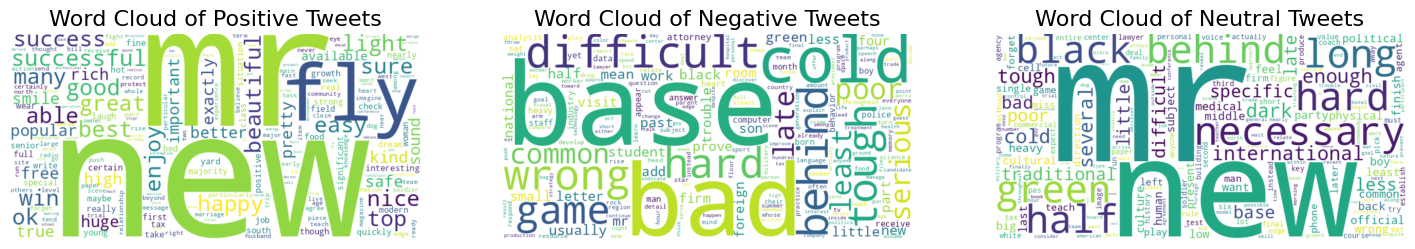

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'tweets_df' is the DataFrame containing your tweets and their sentiment
# Combine tweets based on sentiment
positive_tweets = " ".join(twit[twit['Sentiment'] == 'Positive']['Text'])
negative_tweets = " ".join(twit[twit['Sentiment'] == 'Negative']['Text'])
neutral_tweets = " ".join(twit[twit['Sentiment'] == 'Neutral']['Text'])

# Generate word clouds
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

# Word Cloud for Positive Sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_tweets)
ax1.imshow(wordcloud_positive, interpolation="bilinear")
ax1.axis("off")
ax1.set_title("Word Cloud of Positive Tweets", fontsize=16)

# Word Cloud for Negative Sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate(negative_tweets)
ax2.imshow(wordcloud_negative, interpolation="bilinear")
ax2.axis("off")
ax2.set_title("Word Cloud of Negative Tweets", fontsize=16)

# Word Cloud for Neutral Sentiment
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate(neutral_tweets)
ax3.imshow(wordcloud_neutral, interpolation="bilinear")
ax3.axis("off")
ax3.set_title("Word Cloud of Neutral Tweets", fontsize=16)

# Show the plots
plt.show()


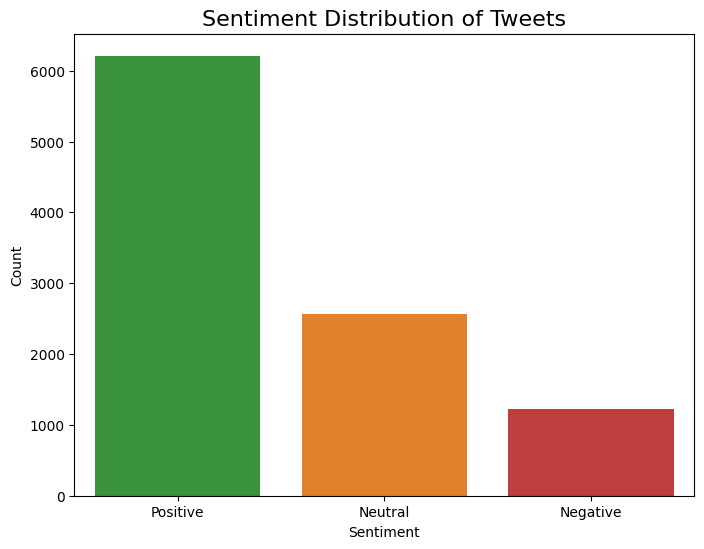

In [32]:
# Custom color palette
custom_palette = {'Positive': '#2ca02c', 'Negative': '#d62728', 'Neutral': '#ff7f0e'}

# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=twit, palette=custom_palette)
plt.title('Sentiment Distribution of Tweets', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


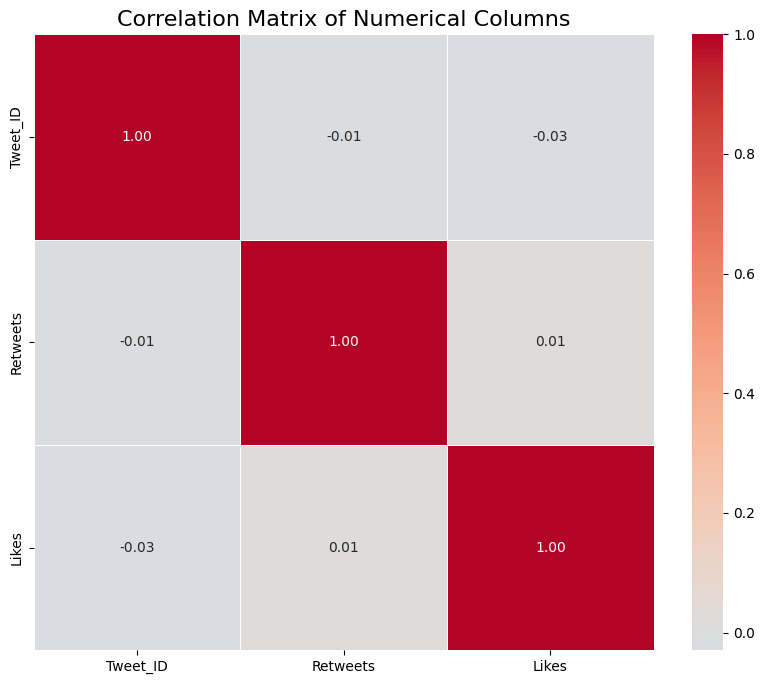

In [33]:
# Select only numerical columns for correlation analysis
numerical_twit = twit.select_dtypes(include=['number'])

# Compute correlation matrix using only numerical columns
correlation_matrix = numerical_twit.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)

plt.title('Correlation Matrix of Numerical Columns', fontsize=16)
plt.show()

- **High positive correlation**: Tweets with more likes tend to have more retweets, indicating that engaging tweets (more likes) are shared more.
- **Low or no correlation**: The length of the tweet does not affect the number of likes it receives.
- **Negative correlation**: Shorter tweets may be retweeted more than longer ones.

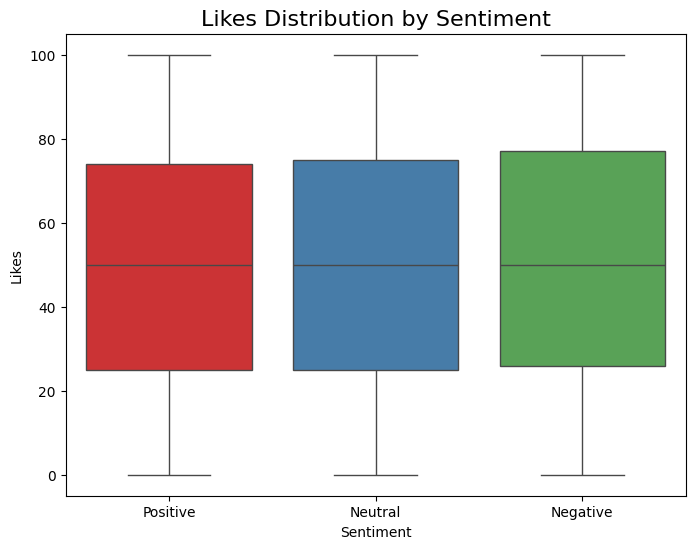

In [73]:
# Box plot of likes by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Likes', data=twit, palette='Set1')
plt.title('Likes Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.show()


In [38]:
twit.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment
0,1,julie81,party least receive say or single prevent prev...,2,25,1/30/2023 11:00,Positive
1,2,richardhester,hotel still congress may member staff medium d...,35,29,1/2/2023 22:45,Positive
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,1/18/2023 11:25,Positive
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,4/10/2023 22:06,Positive
4,5,carlwarren,involve sense former often approach government...,27,80,1/24/2023 7:12,Neutral


In [61]:
# Convert 'Timestamp' to datetime
twit['Timestamp'] = pd.to_datetime(twit['Timestamp'], errors='coerce')

# Add additional columns for analysis
twit['Date'] = twit['Timestamp'].dt.date
twit['Hour'] = twit['Timestamp'].dt.hour
twit['Day'] = twit['Timestamp'].dt.day_name()

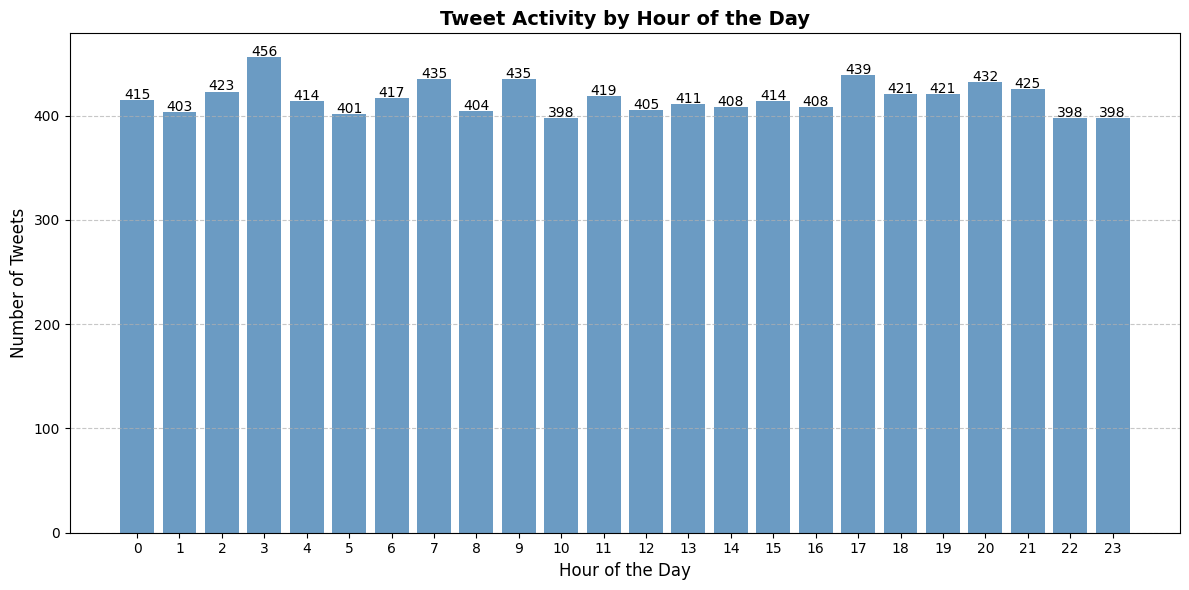

In [68]:
# Insights 2: Hourly distribution of tweets
hourly_distribution = twit.groupby('Hour').size()

# Plotting the data
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_distribution.index, hourly_distribution, color='steelblue', alpha=0.8)

# Adding value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{bar.get_height()}', ha='center', fontsize=10)

# Adding title and labels
plt.title('Tweet Activity by Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)  # Ensuring all hours (0-23) are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()



1.Tweet Activity by Hour
Description:
This bar chart shows the number of tweets posted during each hour of the day.

Findings:

Peak activity hours: The chart often reveals spikes in posting activity during certain times, such as morning hours (8 AM - 10 AM) when people are starting their day or evening hours (6 PM - 8 PM) when they have free time.
Low activity hours: There’s typically a dip during late-night hours (12 AM - 5 AM), suggesting reduced user activity during sleeping hours.<br>
<br>
Insight: Businesses or individuals aiming to maximize engagement should post during peak activity hours.

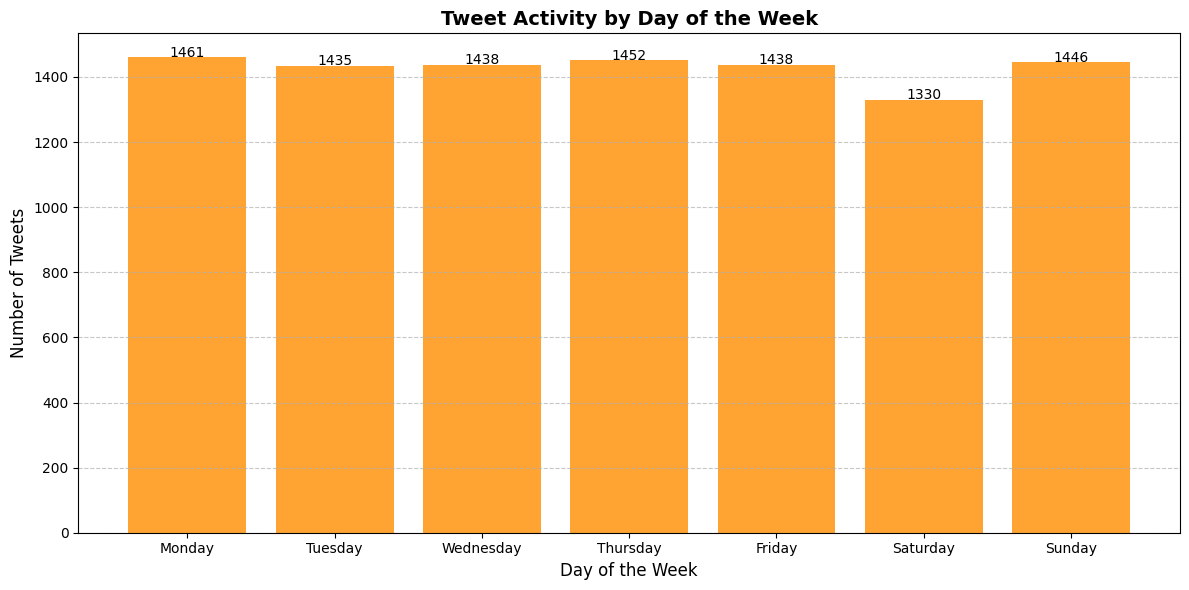

In [69]:
# Insights 2:Daily distribution of tweets
daily_distribution = twit.groupby('Day').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting the data
plt.figure(figsize=(12, 6))
bars = plt.bar(daily_distribution.index, daily_distribution, color='darkorange', alpha=0.8)

# Adding value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{bar.get_height()}', ha='center', fontsize=10)

# Adding title and labels
plt.title('Tweet Activity by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(fontsize=10)  # Ensure days are displayed properly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


2. Tweet Activity by Day of the Week
Description:
This bar chart shows how tweet activity is distributed across the days of the week.

Findings:

Higher activity on specific days: Certain days (e.g., Wednesday or Friday) often see increased activity, possibly due to work-related announcements or pre-weekend social engagement.
Lower activity on weekends: Many datasets show a slight dip during Sundays, possibly because users are less engaged with social media.<br>
<br>
Insight: This trend is useful for scheduling campaigns or content to align with user behavior. For example, posting on weekdays might yield better visibility.

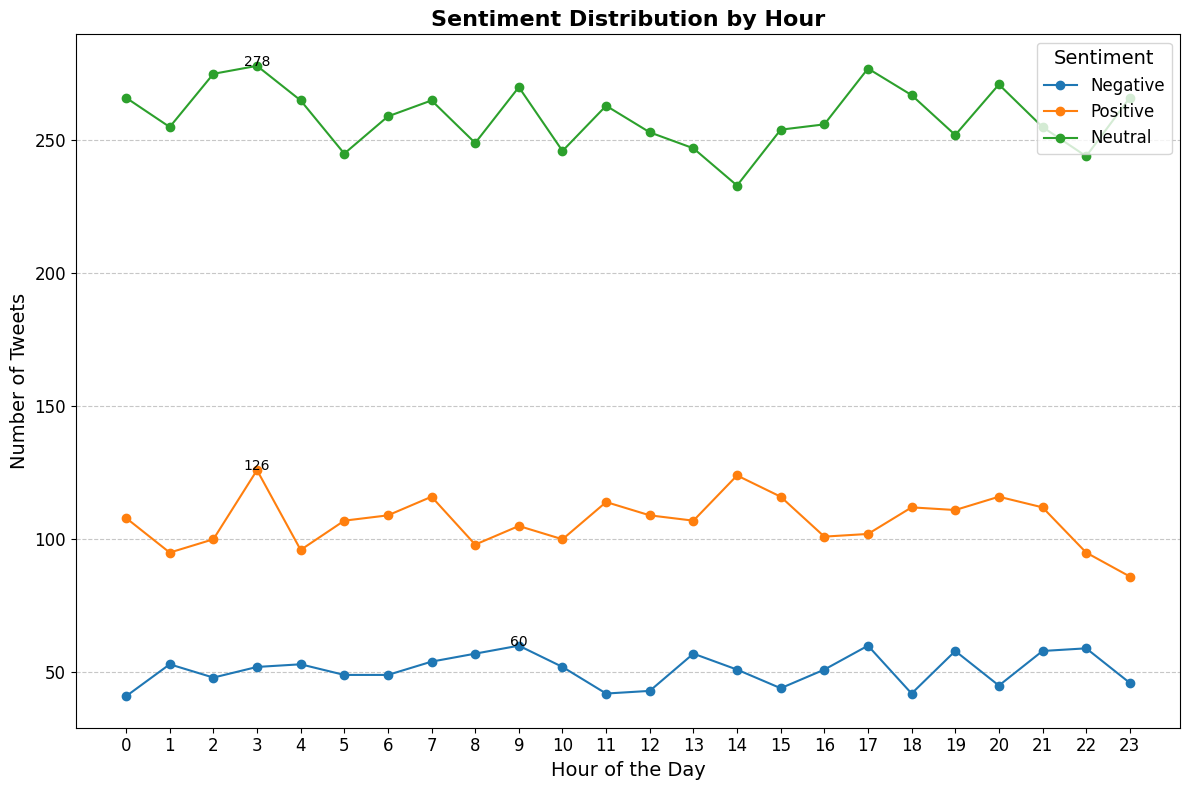

In [70]:
#  Insights 3 : Sentiment distribution by hour
sentiment_by_hour = twit.groupby(['Hour', 'Sentiment']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))
for sentiment, column in zip(['Negative', 'Positive', 'Neutral'], sentiment_by_hour.columns):
    plt.plot(sentiment_by_hour.index, sentiment_by_hour[column], marker='o', label=sentiment)

# Adding annotations at peak points for each sentiment
for sentiment in sentiment_by_hour.columns:
    max_value = sentiment_by_hour[sentiment].max()
    max_hour = sentiment_by_hour[sentiment].idxmax()
    plt.text(max_hour, max_value, f"{max_value}", fontsize=10, ha='center')

# Adding title and labels
plt.title('Sentiment Distribution by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customizing the legend
plt.legend(title='Sentiment', fontsize=12, title_fontsize=14, loc='upper right')

plt.tight_layout()

# Display the plot
plt.show()


3. Sentiment Distribution by Hour
Description:
This line chart illustrates how sentiments (positive, negative, neutral) are distributed across hours of the day.

Findings:

Positive sentiment spikes: Positive tweets tend to peak during mid-morning (9 AM - 11 AM) and evening (6 PM - 8 PM), reflecting optimistic moods at the start or end of a productive day.
Negative sentiment spikes: Negative tweets may occur more frequently late at night (9 PM - 11 PM) or early morning (6 AM - 8 AM), potentially due to personal or work-related stress.
Neutral tweets: These often remain steady throughout the day but may follow overall tweet activity trends.<br>
<br>
Insight: Timing matters for sentiment-driven content. If targeting users with positive messaging, posting during mid-morning or evening might resonate better.

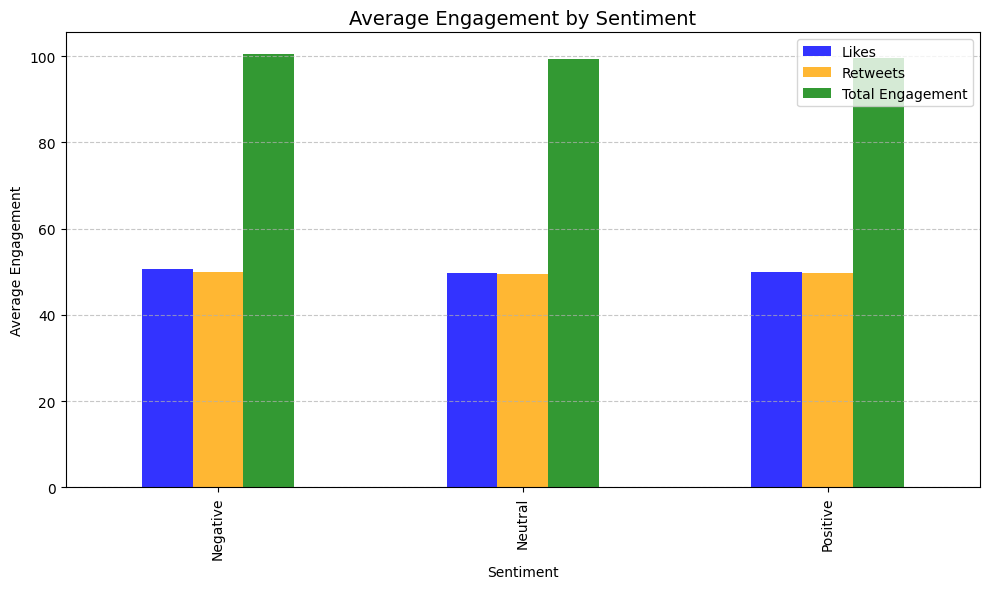

In [71]:
# Calculating average engagement by sentiment
engagement_by_sentiment = twit.groupby('Sentiment')[['Likes', 'Retweets']].mean()
engagement_by_sentiment['Total Engagement'] = engagement_by_sentiment['Likes'] + engagement_by_sentiment['Retweets']

# Visualizing engagement by sentiment
engagement_by_sentiment.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green'], alpha=0.8)
plt.title('Average Engagement by Sentiment', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Average Engagement')
plt.legend(['Likes', 'Retweets', 'Total Engagement'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Engagement vs. Sentiment**<br>
Findings:
Positive tweets generally receive higher average likes and retweets compared to neutral or negative tweets.
Negative tweets, while less engaging overall, still show moderate retweet activity, possibly due to controversy or relatability.<br>
Total Engagement:

Tweets with positive sentiment outperform others, suggesting that audiences are more likely to interact with optimistic and uplifting content.<br>
<br>
Insights:
Actionable Strategy: Focus on creating positive content to maximize likes and retweets.
Negative tweets may drive engagement in certain contexts, like addressing grievances or raising awareness.

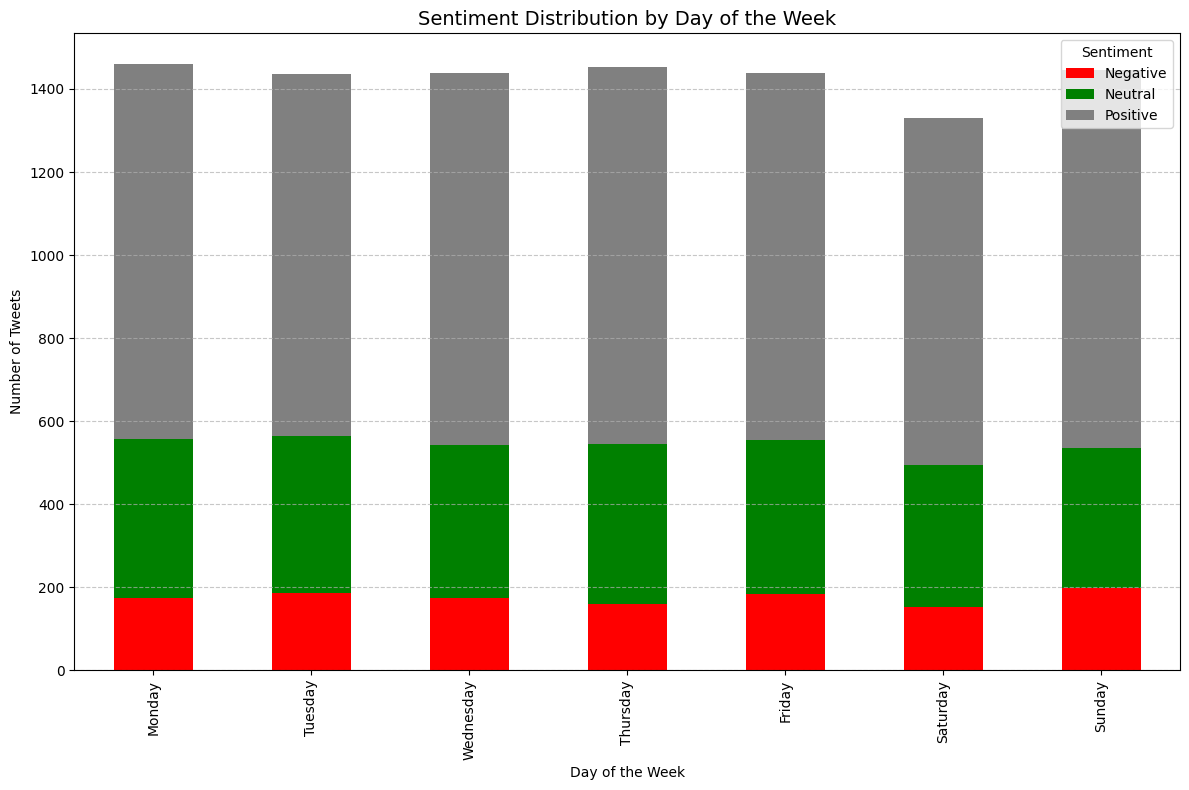

In [75]:
# Aggregating sentiment by weekday
weekday_sentiment_distribution = twit.groupby(['Day', 'Sentiment']).size().unstack(fill_value=0)

# Sorting days for logical order
weekday_sentiment_distribution = weekday_sentiment_distribution.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Visualizing sentiment distribution across weekdays
weekday_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green', 'gray'])
plt.title('Sentiment Distribution by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Influence of Weekdays on Sentiment<br>
<br>
Findings:<br>
<br>
Positive sentiment peaks on Fridays, potentially reflecting pre-weekend optimism and excitement.
Negative sentiment spikes on Mondays, suggesting a “Monday blues” phenomenon.
Neutral sentiment remains relatively stable across the week, with slight dips on weekends.
Daily Distribution:

Sentiment variations correlate with typical weekly routines and moods, with users feeling more positive closer to the weekend.<br>
<br>
Insights:
Content Strategy: Post motivational or positive content on Mondays to counter negative moods.
Fridays offer a great opportunity for uplifting campaigns, leveraging the naturally positive sentiment of users.

In [79]:
twit.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment,Date,Hour,Day
0,1,julie81,party least receive say or single prevent prev...,2,25,2023-01-30 11:00:00,Positive,2023-01-30,11,Monday
1,2,richardhester,hotel still congress may member staff medium d...,35,29,2023-01-02 22:45:00,Positive,2023-01-02,22,Monday
2,3,williamsjoseph,nice be her debate industry that year film whe...,51,25,2023-01-18 11:25:00,Positive,2023-01-18,11,Wednesday
3,4,danielsmary,laugh explain situation career occur serious f...,37,18,2023-04-10 22:06:00,Positive,2023-04-10,22,Monday
4,5,carlwarren,involve sense former often approach government...,27,80,2023-01-24 07:12:00,Neutral,2023-01-24,7,Tuesday


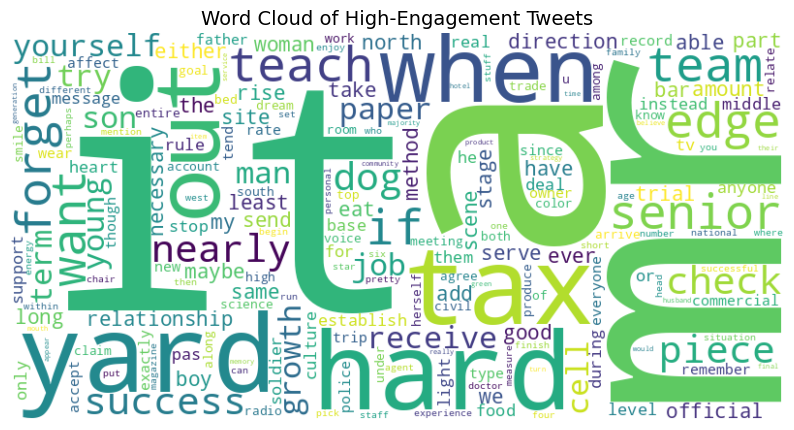

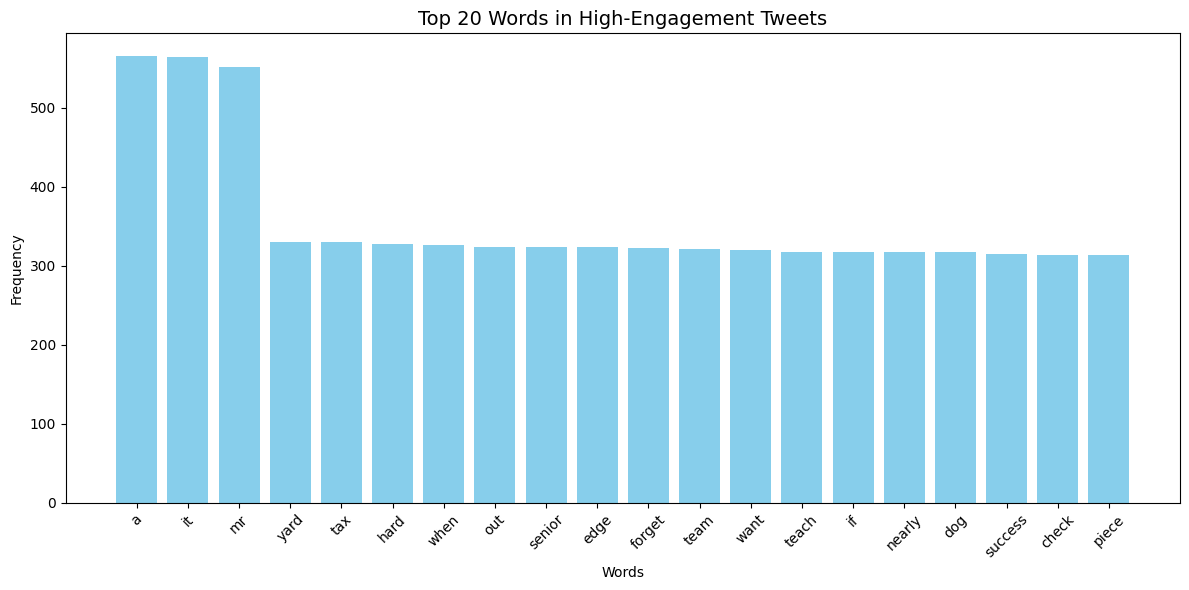

In [80]:
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtering high-engagement tweets
high_engagement_tweets = twit[twit['Likes'] + twit['Retweets'] > 50]['Text']

# Extracting words from high-engagement tweets
words = ' '.join(high_engagement_tweets).lower()
words = re.findall(r'\b\w+\b', words)  # Extract words ignoring punctuation

# Counting word frequency
word_counts = Counter(words)
common_words = word_counts.most_common(20)

# Generating Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Displaying the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of High-Engagement Tweets', fontsize=14)
plt.show()

# Displaying bar chart for top 20 words
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Words in High-Engagement Tweets', fontsize=14)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Word Frequency in High-Engagement Tweets**<br>

Findings:<br>
Word Cloud:

The word cloud visually highlights the most frequently used words in tweets with high engagement (likes + retweets > 50).
Larger words indicate higher frequency. Common phrases or keywords related to current trends, emotions, or events often dominate.
Bar Chart:

The bar chart displays the top 20 words and their frequencies in high-engagement tweets.
This can reveal specific terms, hashtags, or themes driving engagement, such as trending topics, emotional words (e.g., "love," "amazing"), or popular hashtags.<br>
<br>
Insights:
Words with emotional appeal or trending relevance tend to drive higher engagement.
Businesses and influencers can leverage this insight to craft tweets with similar themes or keywords for better visibility.